In this notebook, we're going to illustrate how TensorFlow performa automatic differentiation, freeing us from the hassle of taking derivatives ourselves. Similar tooling is present in other deep learning frameworks, and libraries that add in such functionality for e.g. Numpy can be found as well.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorboardcolab import TensorBoardColab
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


We're going to construct a simple computational graph here, where we add two numbers together, multiply the result, and then add a final number to it.

We're using `tf.compat.v1.Session()` here to make the setup a bit easier.

In [ ]:
with tf.compat.v1.Session() as sess:

  a = tf.add(1, 2, name='First_add')
  b = tf.multiply(a, 3, name='Multiply')
  c = tf.add(b, 5, name='Second_add')

  writer = tf.compat.v1.summary.FileWriter("output", sess.graph)
  print('The result is:', sess.run(c))
  writer.close()

The result is: 14


Next, we start up TensorBoard. We use `tensorboardcolab` here, which will take care of automatically forwarding the localhost instance to a web link we can access.

In [ ]:
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://33d6a94f3c50.ngrok.io


Stop the following command manually once you're done inspecting the TensorBoard:

In [ ]:
!tensorboard --logdir=output

2020-07-21 10:42:05.447348: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C


TensorFlow keeps track of all operations, and can -- from there -- figure out how to perform derivates. We can verify this explicitely using `GradientTape`.

In [ ]:
x = tf.constant(3.0)

with tf.GradientTape() as g:
  g.watch(x)
  y = x * x

g.gradient(y, x) # dy/dx = 2x

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

This also works for more complicated functions, e.g. with `if` statements:

In [ ]:
def f(x, y):
  output = x
  if x > 5:
    output = tf.multiply(output, y*x)
  return output

def grad(x, y):
  with tf.GradientTape() as g:
    g.watch(x)
    out = f(x, y)
  return g.gradient(out, x) # dout/dx

x = tf.convert_to_tensor(2.0)
y = tf.constant(6.0)

grad(x, y)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

We can also plot the gradient (orange) for different position of `f(x, 6)` (blue):

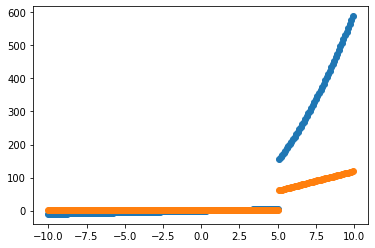

In [ ]:
x = np.arange(-10, 10, .1)
y = np.array([ f(_, 6) for _ in x ])
dout_dx = np.array([ grad(tf.convert_to_tensor(float(_)), tf.constant(6.0)).numpy() for _ in x ])

plt.scatter(x, y)
plt.scatter(x, dout_dx)